# 1. 가설 - K-Beauty는 성장하고 있을까? 
## 가설세우기, 데이터 로드, 전처리

## e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연속

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import os
if os.name =='nt':
    sns.set(font="Malgun Gothic")
%config InlineBackend.figure_format = 'retina'

In [7]:
df_raw = pd.read_csv('C:/Users/wkddn/Downloads/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210921150126.csv', encoding = 'cp949')

In [8]:
df_raw.shape

(450, 33)

In [9]:
# 국가(대륙)별 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

## 분석과 시각화를 위한 tidy data 만들기

In [10]:
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='백만원')

In [11]:
df.shape

(13500, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  13500 non-null  object
 1   상품군별     13500 non-null  object
 2   판매유형별    13500 non-null  object
 3   기간       13500 non-null  object
 4   백만원      13500 non-null  object
dtypes: object(5)
memory usage: 527.5+ KB


In [13]:
int("2021 2/4 p".split()[0])

2021

In [14]:
df['연도'] = df['기간'].map(lambda x : int(x.split()[0]))

In [15]:
df['분기'] = df['기간'].map(lambda x: int(x.split()[1].split('/')[0]))

In [16]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [17]:
df['백만원'] = df['백만원'].replace('-', pd.np.nan).astype(float)

C:\Users\wkddn\AppData\Local\Temp/ipykernel_17300/3887610736.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['백만원'] = df['백만원'].replace('-', pd.np.nan).astype(float)


In [18]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


In [19]:
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11340 entries, 48 to 13499
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  11340 non-null  object 
 1   상품군별     11340 non-null  object 
 2   판매유형별    11340 non-null  object 
 3   기간       11340 non-null  object 
 4   백만원      8316 non-null   float64
 5   연도       11340 non-null  int64  
 6   분기       11340 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 708.8+ KB


In [21]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## 시각화

In [27]:
df_total = df[df['판매유형별'] == "계"].copy()

<AxesSubplot:xlabel='연도', ylabel='백만원'>

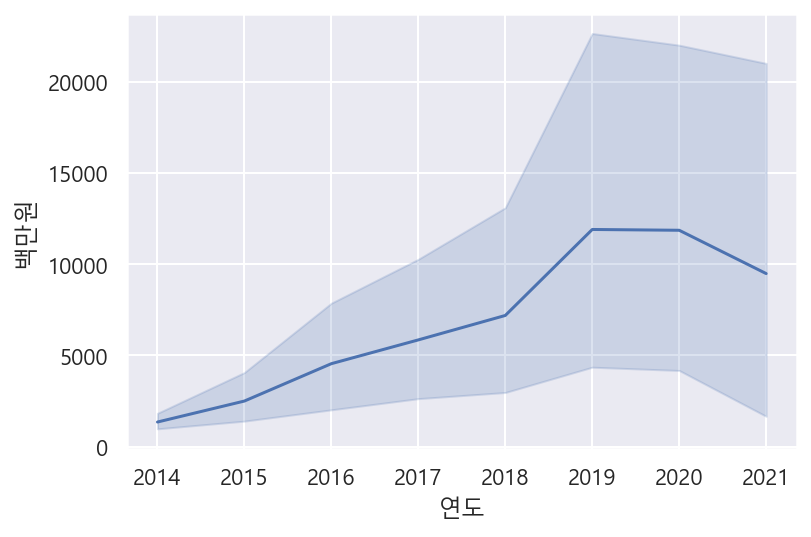

In [28]:
sns.lineplot(data=df_total, x='연도', y='백만원')

In [30]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 48 to 13497
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  3780 non-null   object 
 1   상품군별     3780 non-null   object 
 2   판매유형별    3780 non-null   object 
 3   기간       3780 non-null   object 
 4   백만원      3780 non-null   float64
 5   연도       3780 non-null   int64  
 6   분기       3780 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 365.3+ KB


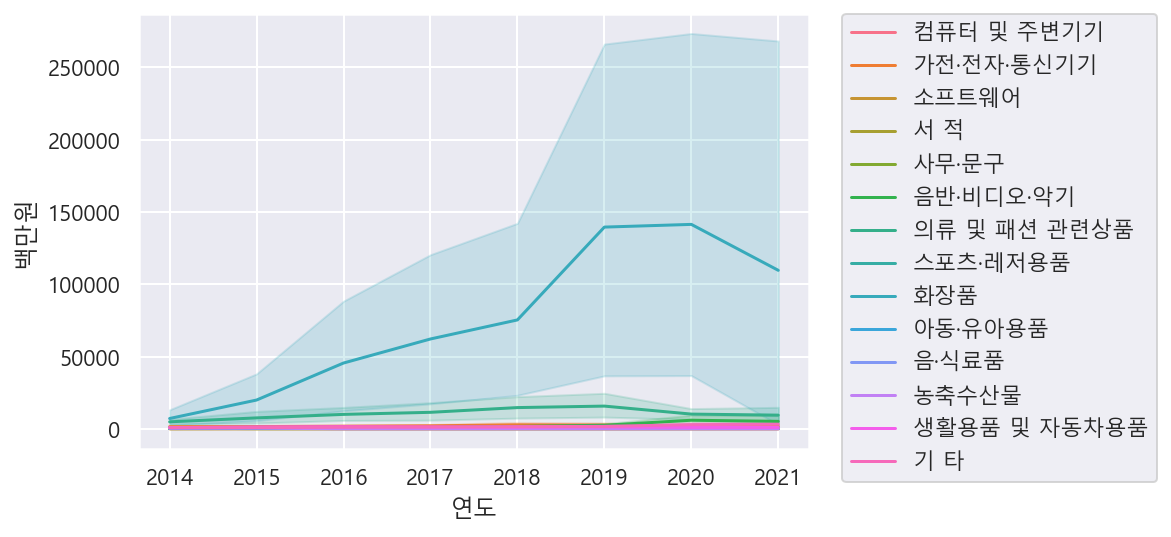

In [34]:
sns.lineplot(data=df_total, x='연도', y='백만원', hue='상품군별')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


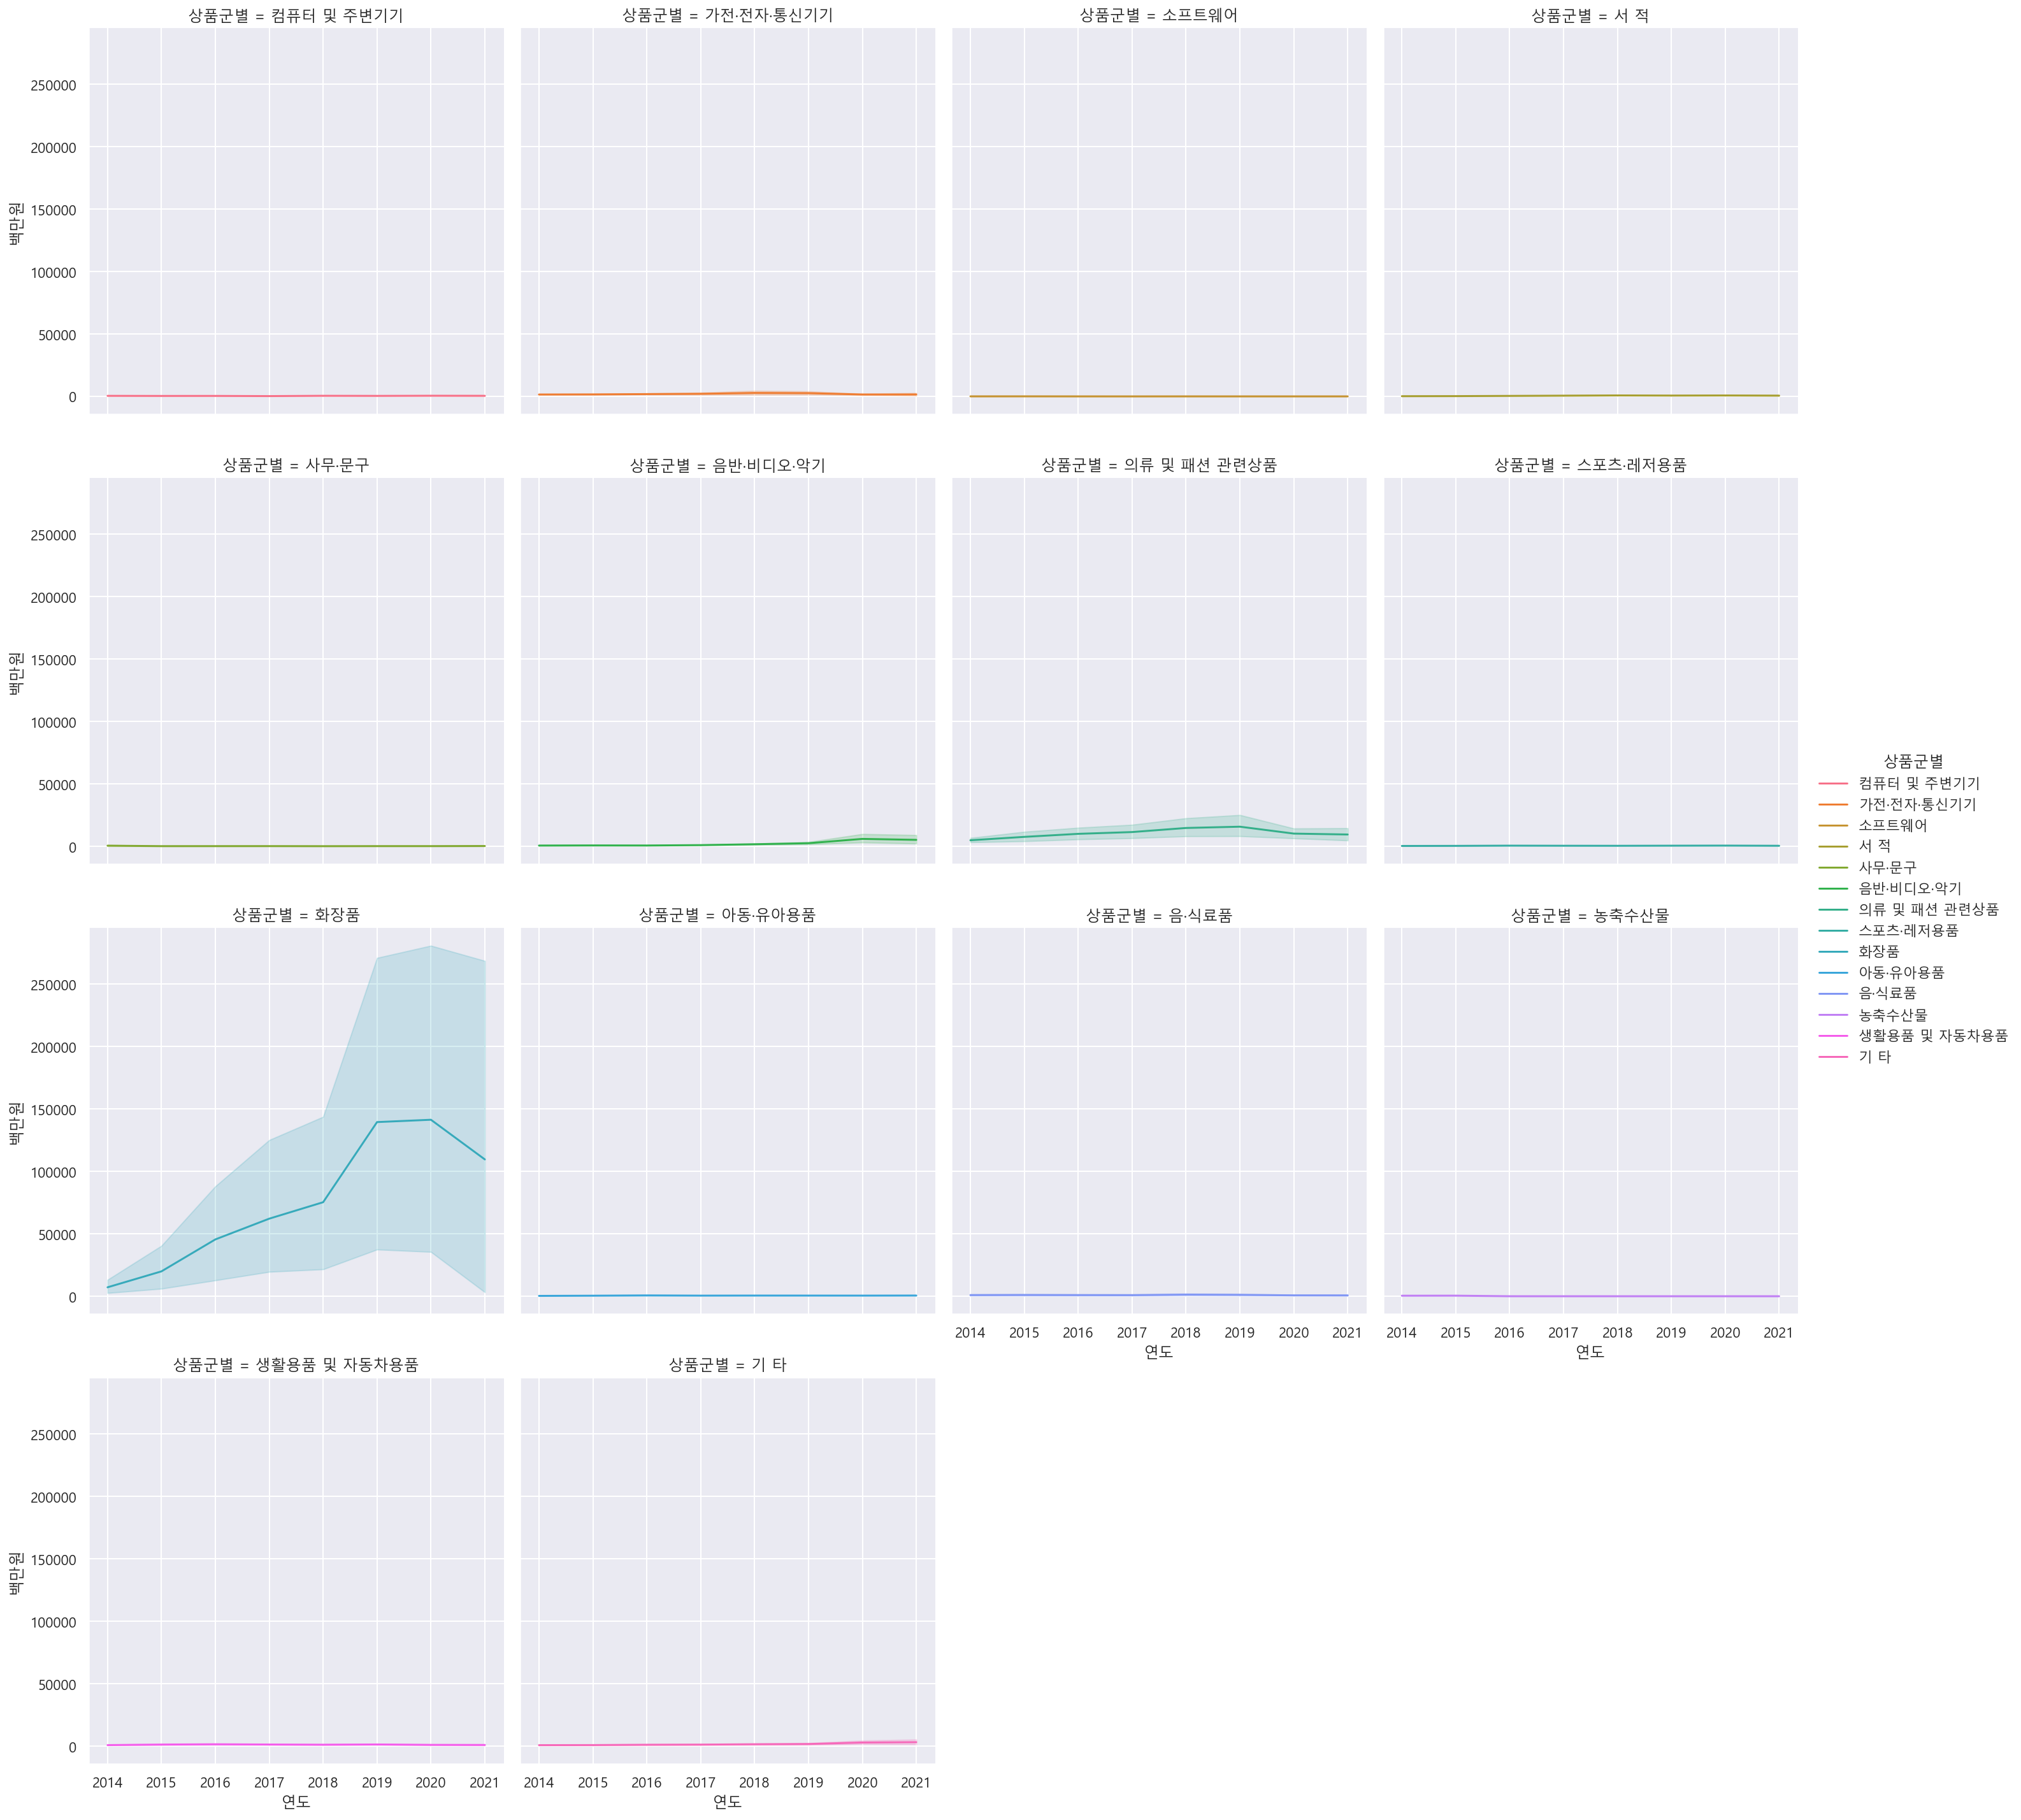

In [38]:
# 자세히 보기 위해 서브플롯으로 표현
sns.relplot(data=df_total, x='연도', y='백만원', 
            hue='상품군별', kind='line', col='상품군별',
            col_wrap=4)

In [60]:
# 화장품이 압도적으로 높아 다른 값들을 보기가 힘드므로 화장품, 의류 및 패션 관련상품을 제외하고 확인
df_sub = df_total[~df_total['상품군별'].isin(['화장품', '의류 및 패션 관련상품'])].copy()

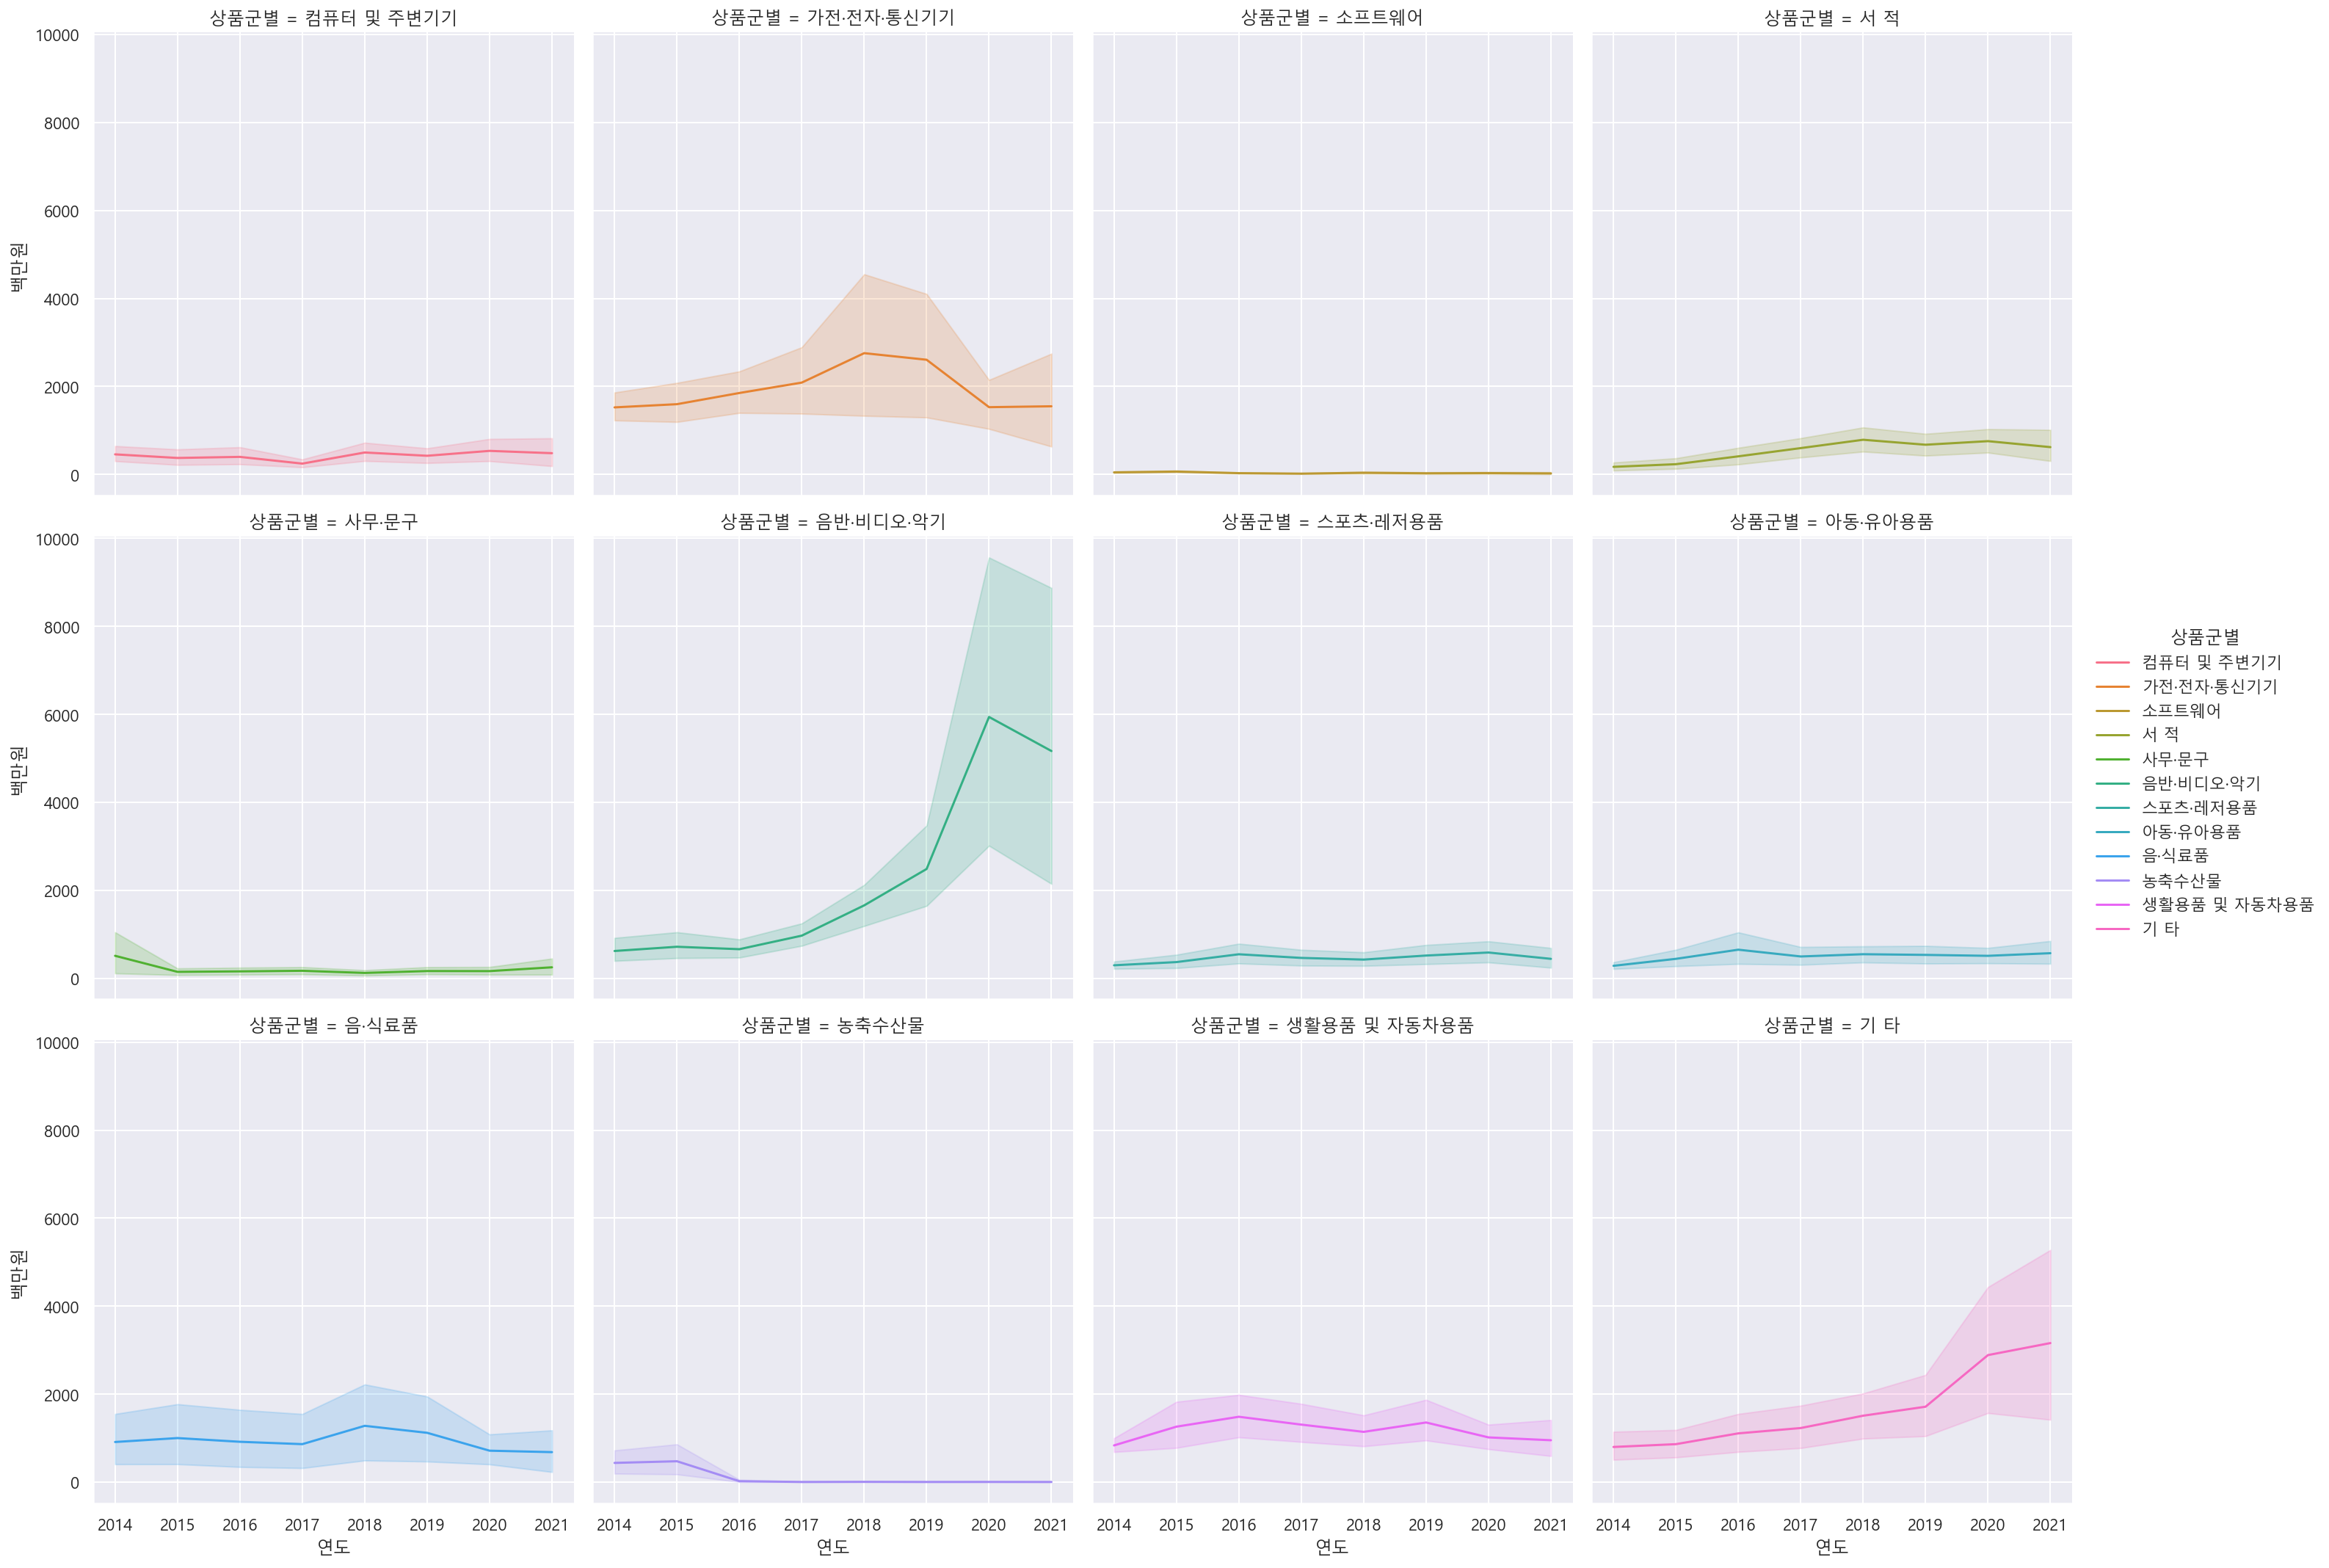

In [61]:
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별',
            col='상품군별', col_wrap=4, kind='line')

In [65]:
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()

In [67]:
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

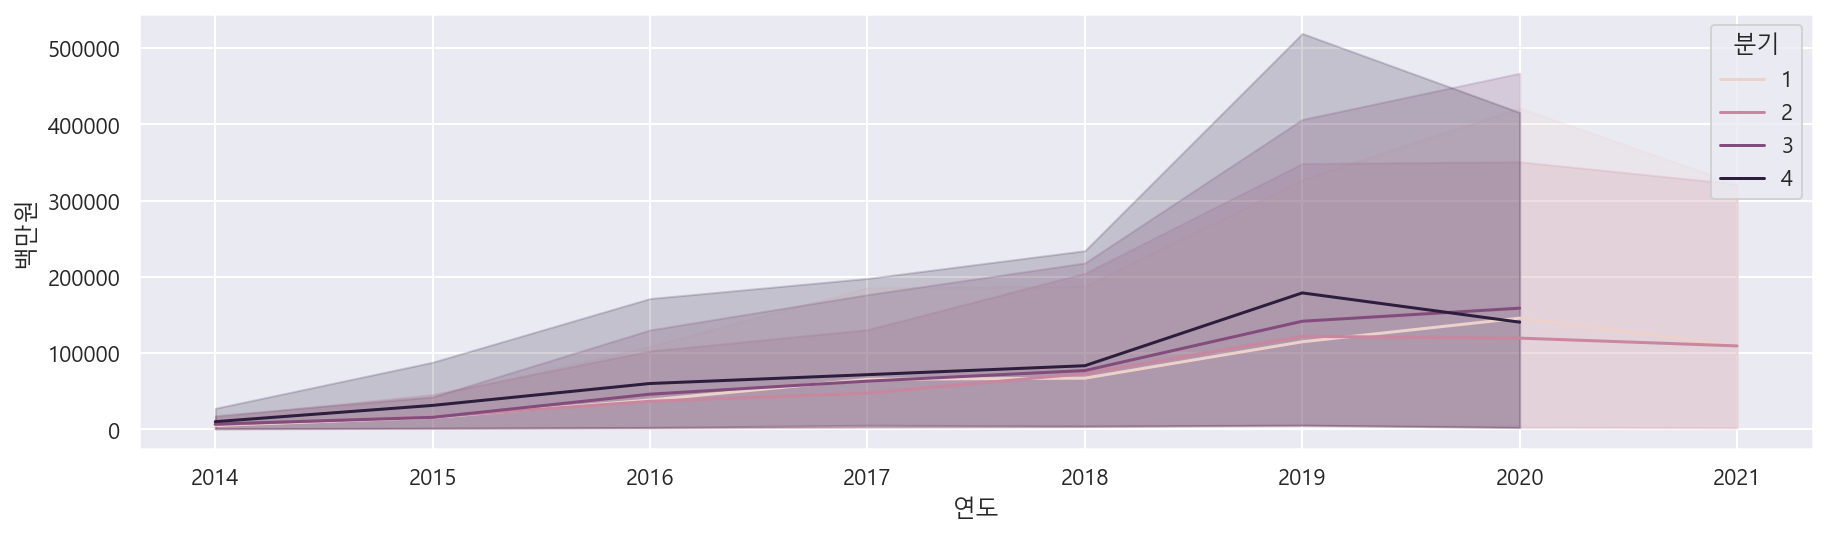

In [70]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

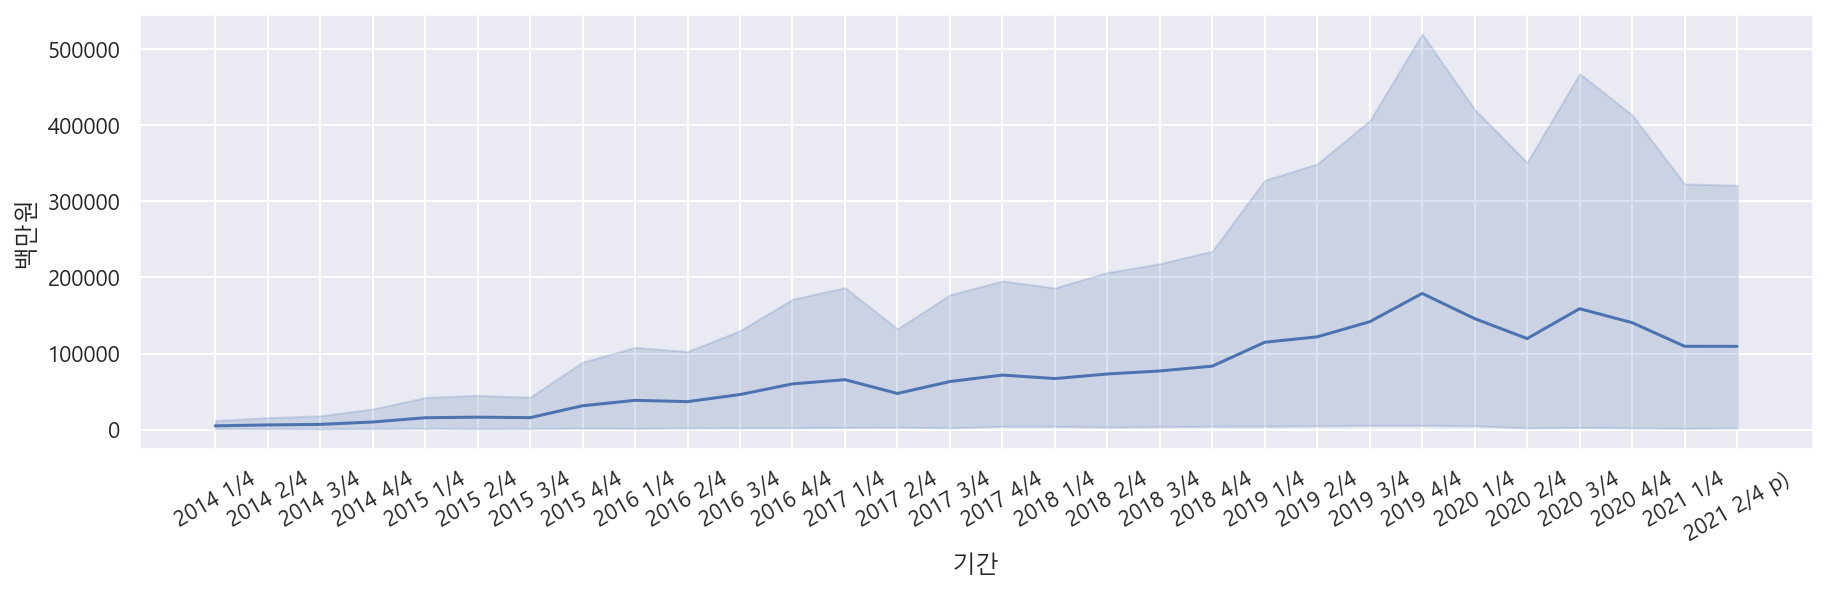

In [72]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

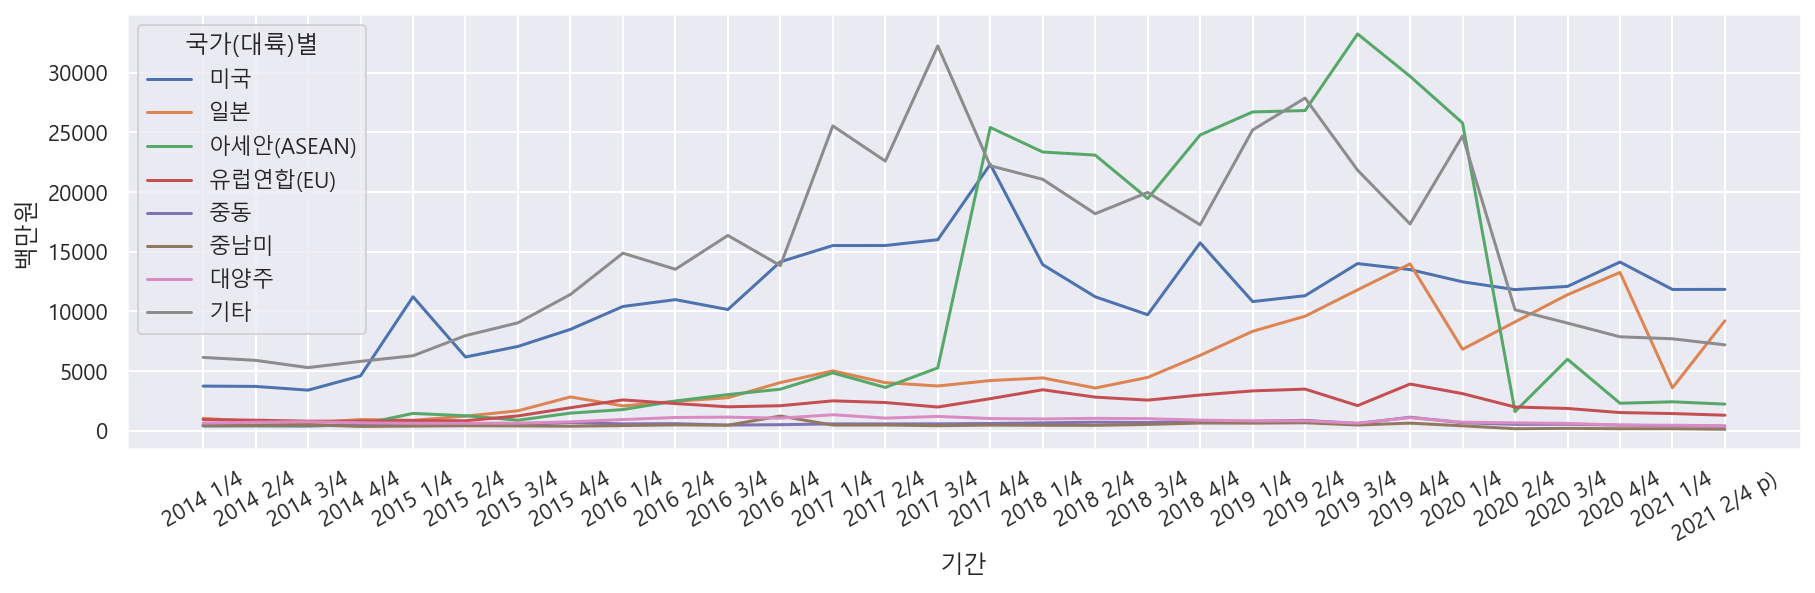

In [75]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'], x='기간', y='백만원', hue='국가(대륙)별')

In [86]:
df_sub = df[(df['판매유형별'] != '계') & (df['판매유형별'] != '면세점')].copy()

<AxesSubplot:xlabel='기간', ylabel='백만원'>

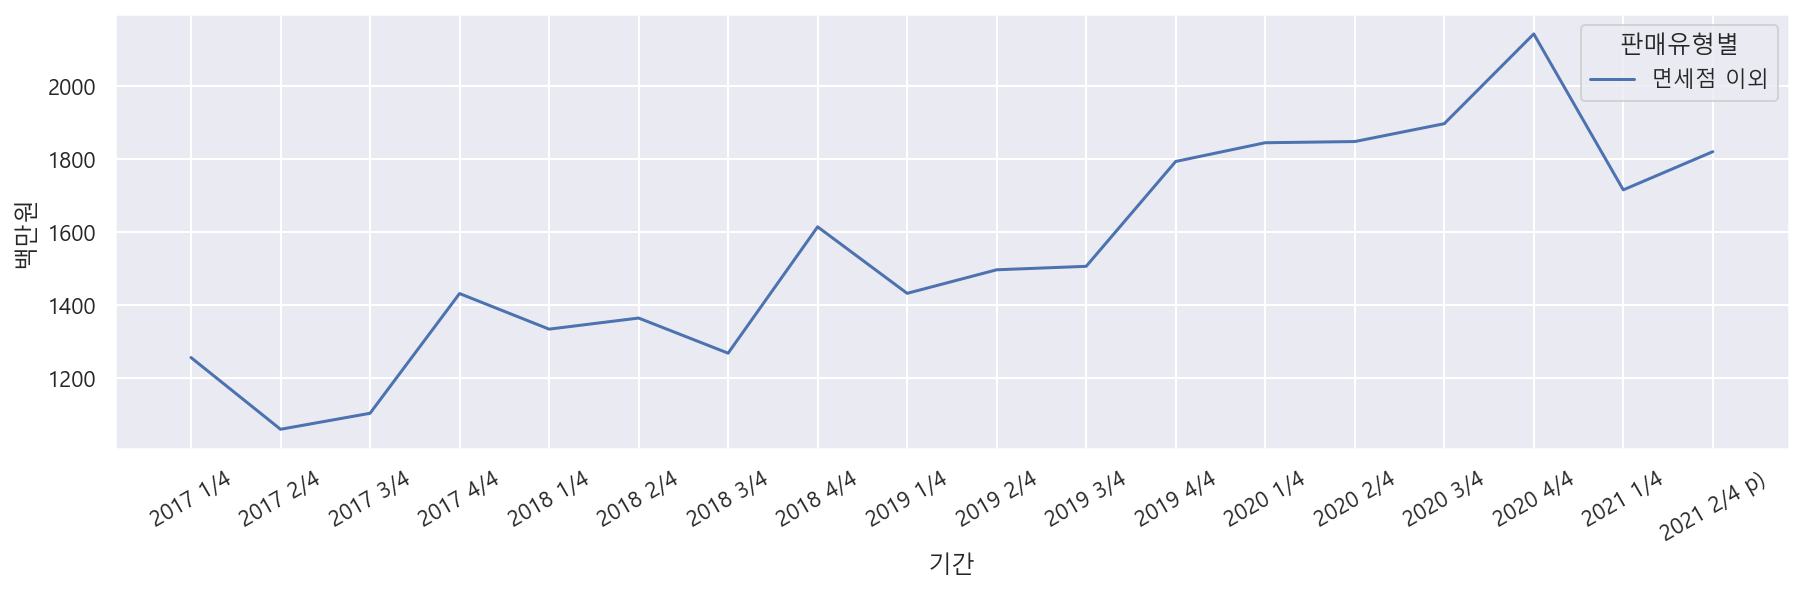

In [88]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x='기간', y='백만원', hue='판매유형별', ci=None)

In [94]:
df_fashion = df[df["상품군별"] == "의류 및 패션 관련상품"].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1


In [95]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

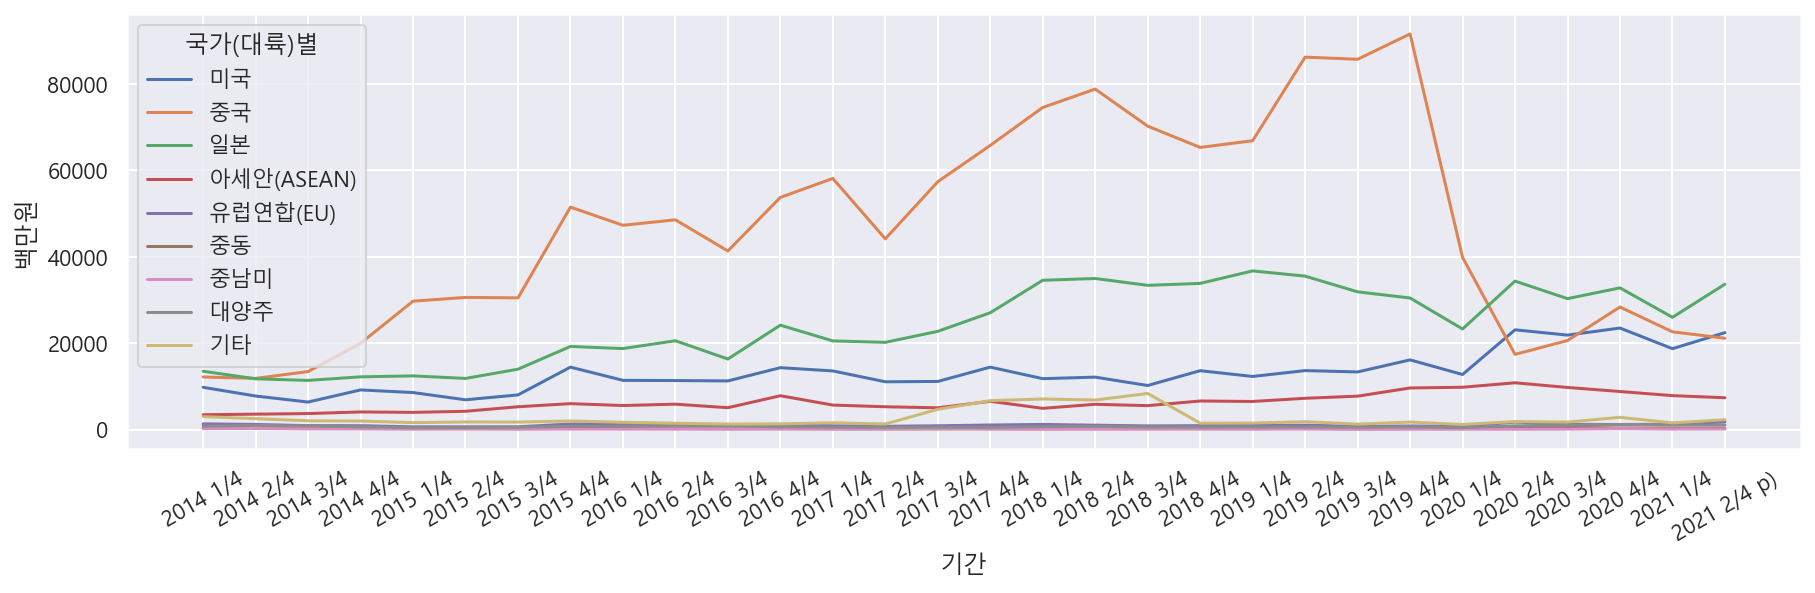

In [96]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

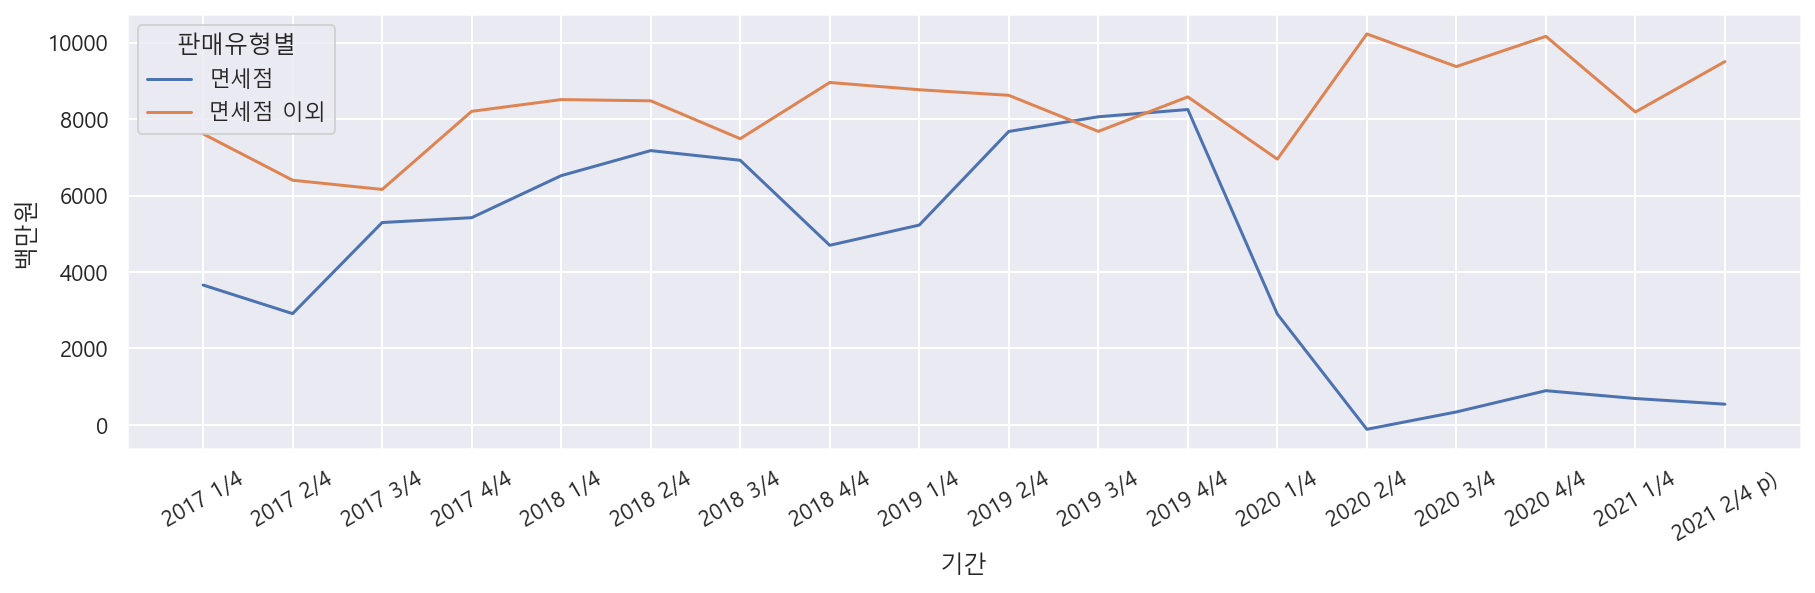

In [98]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

In [99]:
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")


연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,2420.75,1812.00,1479.50,3596.75,5975.25,1618.75,1933.50,1954.5
대양주,848.00,587.25,850.25,566.50,681.25,622.25,921.50,1118.0
미국,8305.75,9516.50,12112.75,12588.25,11968.75,13884.00,20324.25,20604.5
아세안(ASEAN),3734.00,4909.75,6119.50,5667.75,5767.00,7811.75,9828.25,7644.5
유럽연합(EU),1121.25,843.50,1224.75,934.00,1028.50,923.50,1261.25,1538.0
일본,12240.00,14398.50,19976.25,22646.00,34200.00,33659.25,30204.25,29836.5
중국,14382.75,35584.75,47733.00,56351.75,72212.00,82566.75,26579.50,21907.5
중남미,243.75,154.00,162.25,190.50,144.00,136.00,152.75,164.0
중동,293.00,254.50,242.00,193.00,219.75,237.75,441.75,375.0


In [100]:
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")


연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0,3909.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0,2236.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0,41209.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0,15289.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0,3076.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0,59673.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0,43815.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0,328.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0,750.0


In [101]:
df_fashion["판매유형별"].value_counts()


계    270
Name: 판매유형별, dtype: int64

In [102]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0,3909.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0,2236.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0,41209.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0,15289.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0,3076.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0,59673.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0,43815.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0,328.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0,750.0


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

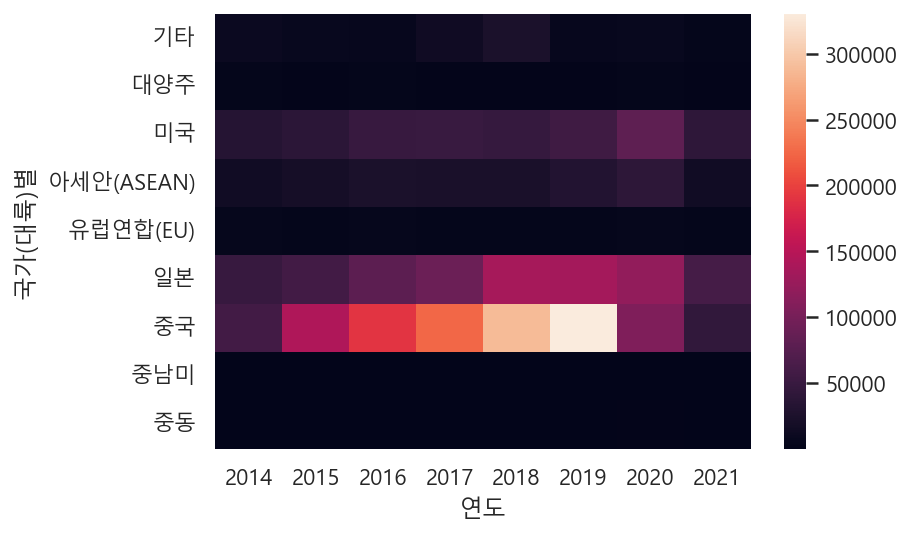

In [103]:
sns.heatmap(result)

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

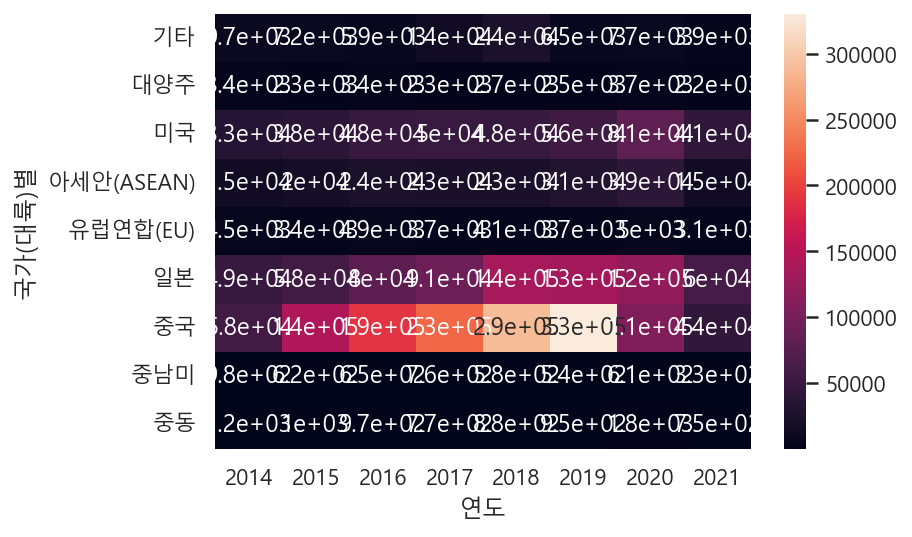

In [104]:
sns.heatmap(result, annot=True)

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

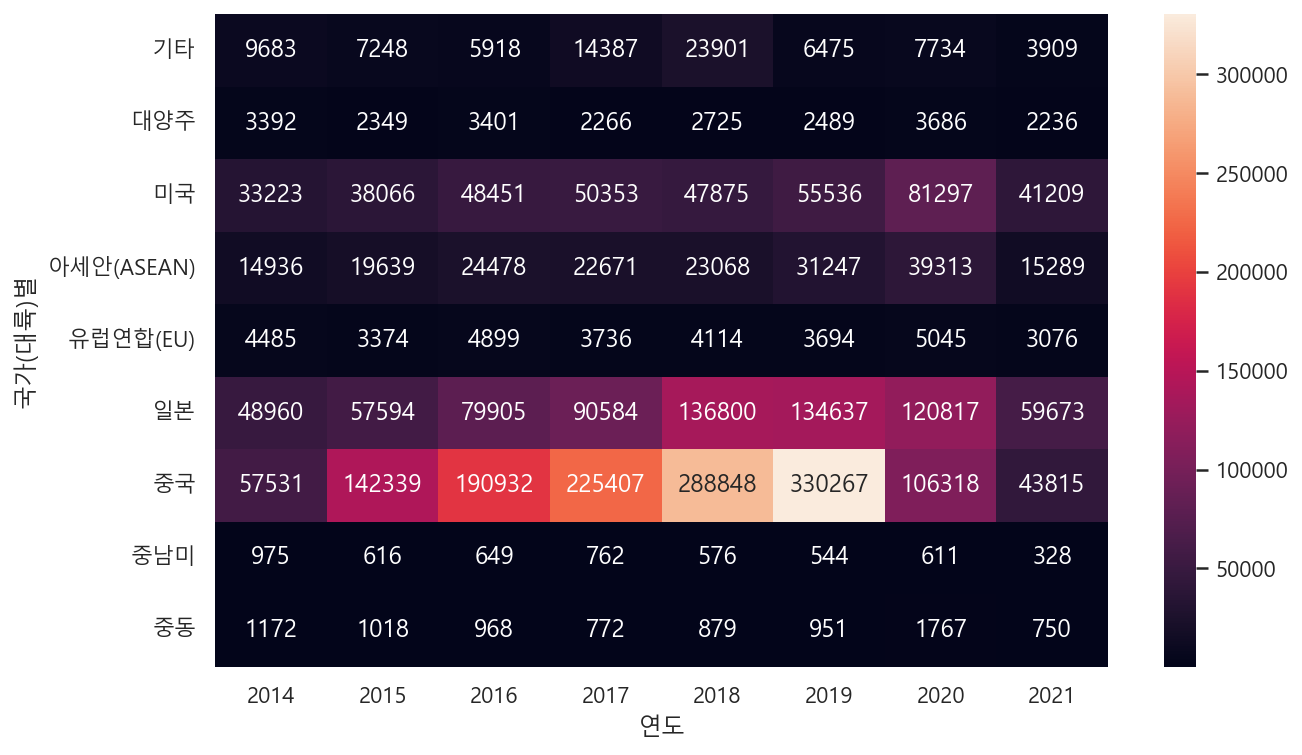

In [106]:
# fmt == 소숫점 없이 float형의 숫자를 나타낼 수 있음
plt.figure(figsize=(10, 6))
sns.heatmap(result, annot=True, fmt='.0f')

In [107]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
13485,기타,아동·유아용품,계,2021 2/4 p),656.0,2021,2
13488,기타,음·식료품,계,2021 2/4 p),52.0,2021,2
13491,기타,농축수산물,계,2021 2/4 p),0.0,2021,2
13494,기타,생활용품 및 자동차용품,계,2021 2/4 p),292.0,2021,2


<AxesSubplot:xlabel='연도', ylabel='백만원'>

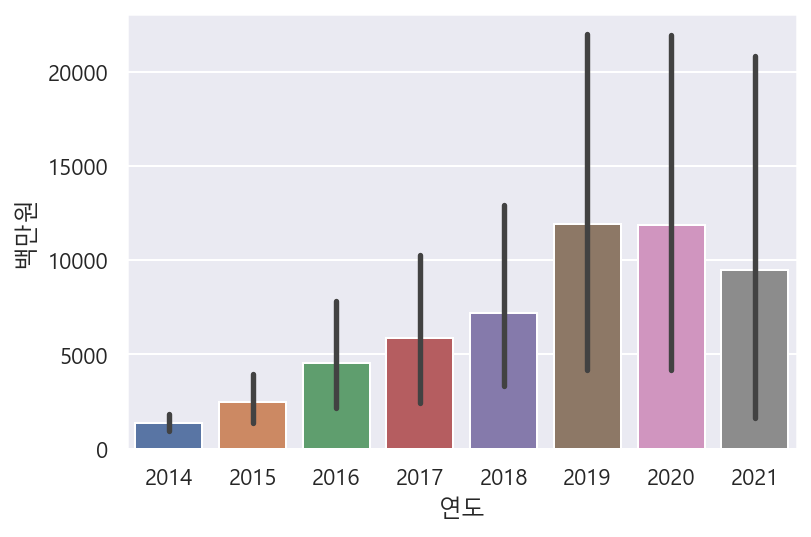

In [108]:
sns.barplot(data=df_total, x='연도', y='백만원')

<AxesSubplot:xlabel='연도', ylabel='백만원'>

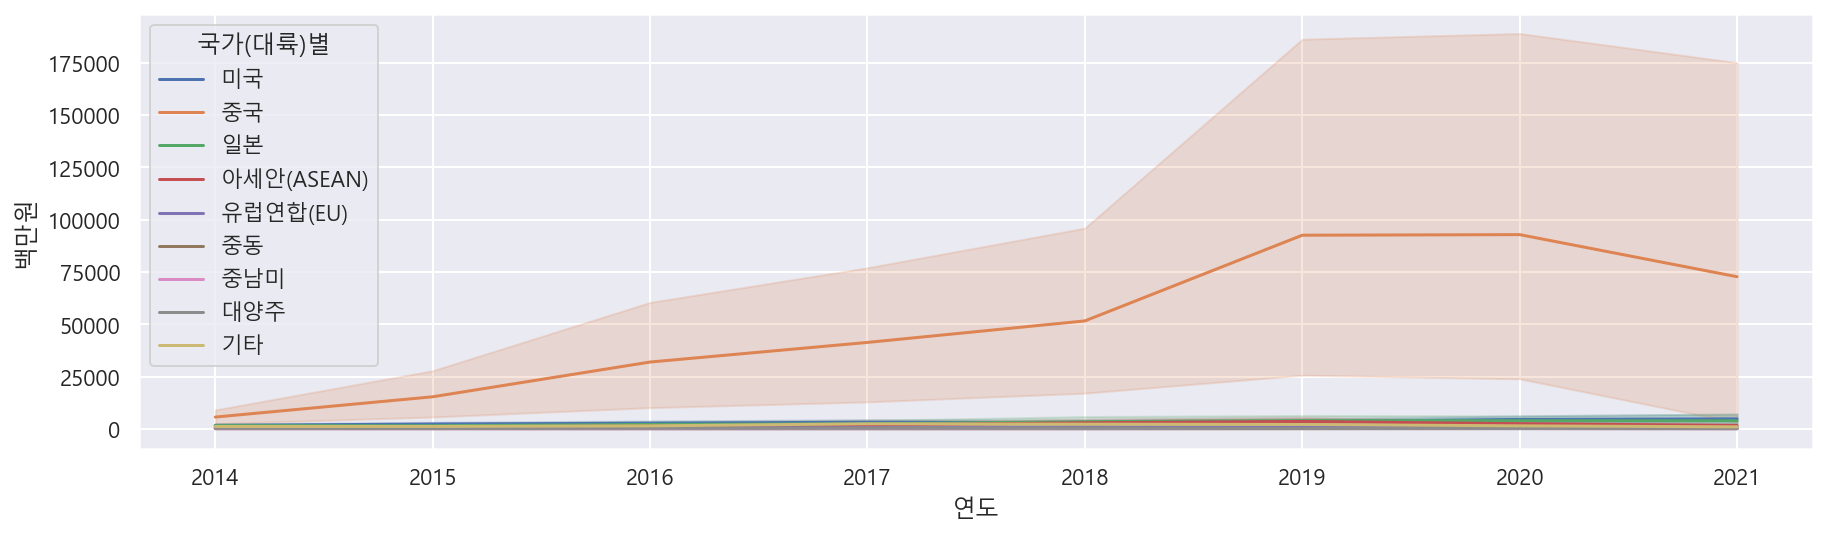

In [109]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

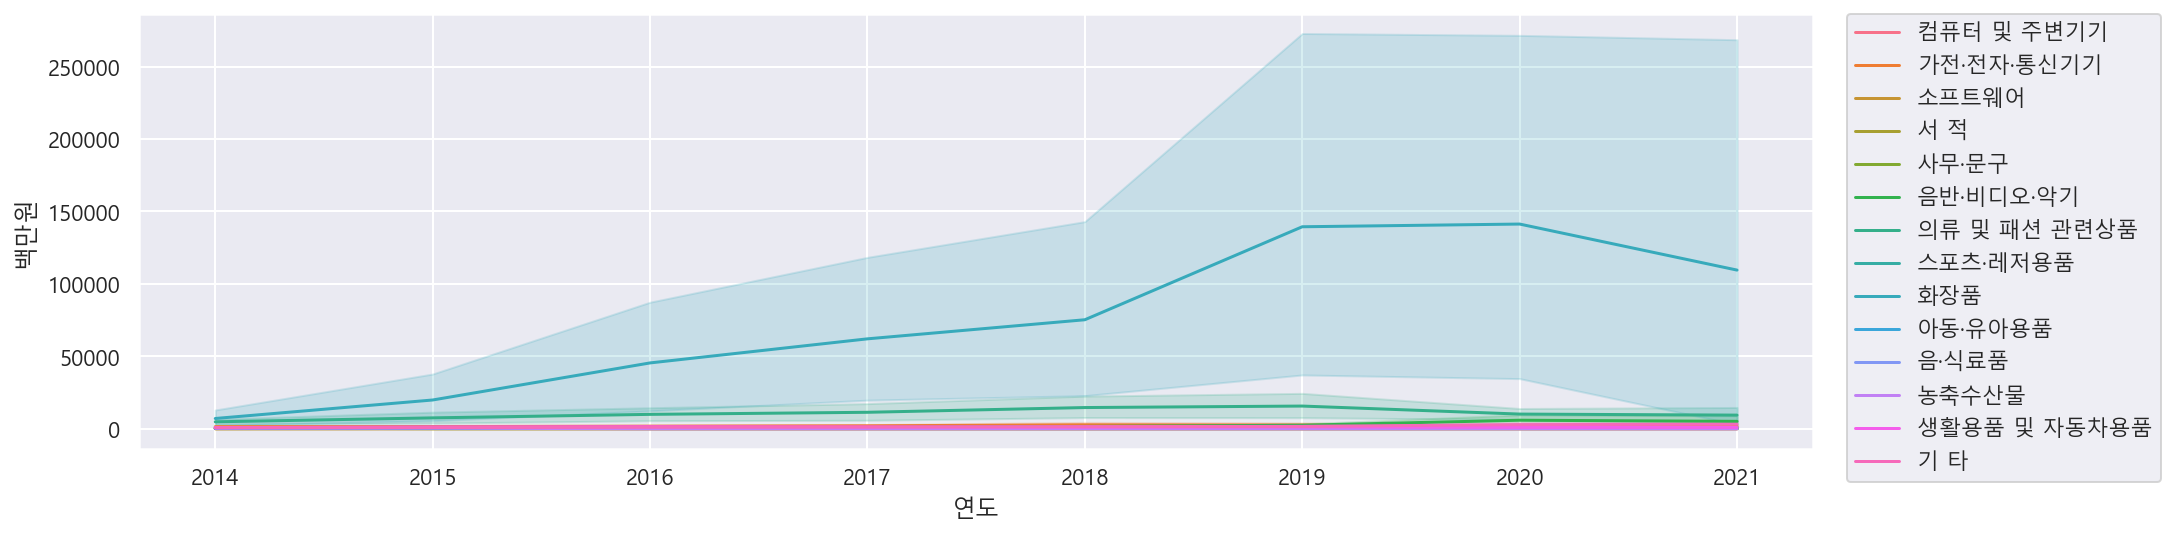

In [110]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)

# 온라인 쇼핑액이 증가하고 있고, 판매를 하는 사람들이 많아지고 있다는 것을 알 수 있음